In [1]:
# Tải thư viện cần thiết
!pip install underthesea
!pip install gensim
!pip install fasttext
!pip install mtranslate
!pip install langdetect

     |████████████████████████████████| 7.6 MB 4.9 MB/s 
     |████████████████████████████████| 965 kB 46.3 MB/s 
     |████████████████████████████████| 581 kB 57.4 MB/s 
     |████████████████████████████████| 235 kB 51.1 MB/s 
     |████████████████████████████████| 68 kB 3.3 MB/s 
  Using cached pybind11-2.9.2-py2.py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3147785 sha256=26fe6243042ff55cc1f5174c427119beb9cefb38fdb6dba5ef13bb81e3cd1f52
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext
  Created wheel for mtranslate: filename=mtranslate-1.8-py3-none-any.whl size=3695 sha256=59859ddb149984cb682e4cdae513364ee6a6dd7de9e037335e7faa73784a6c66
  Stored in directory: /root/.cache/pip/wheels/a4/5d/18/6ea549ba042f5f29728049065bdc8a5cdb3c88a413bb026c9a
Successfully built mtranslate
     |████████████████████████████████| 981 kB 5.2 MB/s 
  

7 bước:
- thu thập dữ liệu
- tiền xử lý dữ liệu
- visualize dữ liệu
- lọc dữ liệu, xóa stopsword, dấu . , các ký hiệu đặc biệt
- tách từ, tạo từ điển, tạo wordtoid, idtoword
- one hot vector mỗi từ
- word embedding bằng cbow

## Các Thư Viện Cần Thiết

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from underthesea import word_tokenize
import seaborn
# from pyvi import ViTokenizer
import string

import sys
import os
import re
import underthesea
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding, Lambda, Dense, InputLayer, Flatten
from keras import backend as K
from keras.preprocessing import sequence
import numpy as np
from tensorflow.python.framework import ops
from keras.utils import np_utils
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Tiền Xử Lý Dữ Liệu

In [4]:
#1 Tập dữ liệu
url = "/content/drive/MyDrive/XLNNTN/Data_comment.xlsx"
data = pd.read_excel(url)
data.head()

Label                                               Data
0      2                                 thịt bò vẫn còn xơ
1      0  các bạn trẻ giờ rất giỏi chọn góc chụp hình nê...
2      0                         không gian cũng nhỏ nữa
3      2  lần đầu ăn titi là ở trần huy liệu quán đông ă...
4      0                             nhân viên thì tạp nham

# **0: Tào lao**

**1: Ngon, Tuyệt vời**

**2: Dở, tệ**

**3: Bán giá cao**

**4: Bán Giá rẻ**

**5: Vệ sinh sạch sẽ, thực phẩm an toàn**

**6: Vệ sinh bẩn, không an toàn thực phẩm**

**7: thái độ phục vụ tốt**

**8: thái độ phục vụ tệ**



In [5]:
# Xóa các cột rỗng
data = data.dropna()
data = data.reset_index()

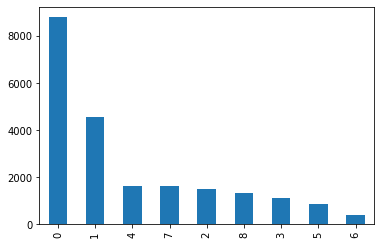

In [6]:
data['Label'].value_counts().plot.bar()

In [7]:
#Tách Dữ liệu Thành X_train và y_train
X_train = data['Data']
X_train = X_train.astype('str')
y_train = data['Label']
y_train = y_train.astype('int')

In [8]:
#Chuyển y_train về label từ 1 - 9
for i in range(1,len(y_train)):
   y_train[i] = y_train[i] -1

In [9]:
#one_hot y_train
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=9)

In [10]:
def tienxuly_Comment(comment):
  table = str.maketrans('','',string.punctuation)
  comment =  str(comment).translate(table)
  s = str()
  for word in word_tokenize(comment):
    word = word.replace(' ','_')
    s = s.replace('/','')
    s = s.replace('!','')
    s = s.replace('?','')
    s = s.replace('@','')
    word = word.lower()
    s = s + ' ' + word
    s = s.strip()
  comment = s
  return comment

In [11]:
for i in range(0, len(X_train)):
  comment = X_train[i]
  comment = tienxuly_Comment(comment)
  X_train[i] = comment

In [12]:
# Tách từ
'''dic=[]
for sentence in X_train:
  for word in word_tokenize(sentence):
    if (word not in dic):
      dic.append(word)
dic'''

def vn_tokenizer(text):
  dic=[]
  for sentence in text:
    for word in word_tokenize(sentence):
      if (word not in dic):
        dic.append(word)
  return dic

In [13]:
dic = vn_tokenizer(X_train)
dic

['thịt',
 'bò',
 'vẫn',
 'còn',
 'xơ',
 'các',
 'bạn',
 'trẻ',
 'giờ',
 'rất',
 'giỏi',
 'chọn',
 'góc',
 'chụp',
 'hình',
 'nên',
 'không_gian',
 'quán',
 'ngoài',
 'đời',
 'có',
 'làm',
 'mình',
 'thất_vọng',
 'nhẹ',
 'vì',
 'trang_trí',
 'không',
 'được',
 'đẹp',
 'cũng',
 'nhỏ',
 'nữa',
 'lần',
 'đầu',
 'ăn',
 'titi',
 'là',
 'ở',
 'trần_huy_liệu',
 'đông',
 'ngon',
 'ấn_tượng',
 'khoai',
 'mềm',
 'cắt',
 'miếng',
 'vừa',
 'chứ',
 'phải',
 'như',
 'khoai_tây',
 'chiên',
 'chi_nhánh',
 'này',
 'nhân_viên',
 'thì',
 'tạp_nham',
 'giá',
 'cả',
 'hơi',
 'cao',
 'so',
 'với',
 'những',
 'chỗ',
 'khác',
 'đầu_tiên',
 'cách',
 'bày',
 'trí',
 'của',
 'khá',
 'và',
 'sạch_sẽ',
 'mấy',
 'món',
 'nem_chua',
 'rán',
 'ngọc',
 'trong',
 'đá',
 'cua',
 'huỳnh',
 'đế',
 'lắm',
 'ạ',
 'nhất',
 'nem',
 'lụi',
 'bị',
 'nhiều',
 'bột',
 'thành',
 'ra',
 'bở',
 'gia_vị',
 'rẻ',
 'mắm',
 'nêm',
 'thơm',
 'dậy',
 'mùi',
 'dứa',
 'cay',
 'dịu',
 'miệng',
 'trung_bình',
 'mỗi',
 'xuất',
 'bánh',
 'gọi',


In [14]:
print('Số lượng từ trong từ điển:',len(dic))

Số lượng từ trong từ điển: 5863


In [15]:
#đọc file stopword
stopword=pd.read_csv("/content/drive/MyDrive/XLNNTN/vietnamese-stopwords-dash.txt",header=None,names=['Stopwords'])
stopword = list(stopword['Stopwords'])

In [153]:
'''tudien = []
for word in dic:
  if (word not in stopword):
    tudien.append(word)
dic = tudien'''

def remove_stopword(text, stopword):
  tudien = []
  for word in text:
    if (word not in stopword):
      tudien.append(word)
  return tudien

In [130]:
def xoa_stopword(sequence, stopword_list) -> list:
    for word in sequence:
        if word in stopword:
            sequence.remove(word)
    return sequence

In [17]:
dic = remove_stopword(dic, stopword)
dic

['thịt',
 'bò',
 'xơ',
 'trẻ',
 'giỏi',
 'góc',
 'chụp',
 'hình',
 'không_gian',
 'quán',
 'đời',
 'thất_vọng',
 'nhẹ',
 'trang_trí',
 'đẹp',
 'đầu',
 'titi',
 'trần_huy_liệu',
 'đông',
 'ngon',
 'ấn_tượng',
 'khoai',
 'mềm',
 'cắt',
 'miếng',
 'khoai_tây',
 'chiên',
 'chi_nhánh',
 'nhân_viên',
 'tạp_nham',
 'giá',
 'hơi',
 'chỗ',
 'đầu_tiên',
 'bày',
 'trí',
 'sạch_sẽ',
 'mấy',
 'món',
 'nem_chua',
 'rán',
 'ngọc',
 'đá',
 'cua',
 'huỳnh',
 'đế',
 'lắm',
 'nem',
 'lụi',
 'bột',
 'thành',
 'bở',
 'gia_vị',
 'rẻ',
 'mắm',
 'nêm',
 'thơm',
 'dậy',
 'mùi',
 'dứa',
 'cay',
 'dịu',
 'miệng',
 'trung_bình',
 'xuất',
 'bánh',
 'gọi',
 'hội',
 'an_nhân',
 'gà',
 'rau_sống',
 'chả_giò',
 'cà_rốt',
 'thịt_quay',
 'giá_cả',
 'mắc',
 'thoáng',
 'mát',
 'rộng',
 'chất_lượng',
 'ngan',
 'mỡ',
 'rau',
 'tươi',
 'bóc',
 'vỏ',
 'đồ',
 'cẩn_thận',
 'hợp',
 'khẩu_vị',
 'mặn',
 'trà',
 'sữa',
 'bao',
 'ly',
 'thường_xuyên',
 'phô',
 'mai',
 'que',
 'xúc_xích',
 'đậm',
 'vị',
 'heo',
 'lẩu',
 'riêu',
 'phụ

In [18]:
print('Số lượng từ trong từ điển sau khi loại bỏ stopword:',len(dic))

Số lượng từ trong từ điển sau khi loại bỏ stopword: 5547


In [19]:
vocab_size = len(dic)+1
vocab_size

5548

In [20]:
# tạo wordtoid chứa {'Trường':1,...}
# tạo idtoword chứa {1:'Trường',...}
wordtoid = {}
idtoword = {}
count = 1  
for w in dic:
  wordtoid[w] = count
  idtoword[count] = w
  count +=1
# gán 'Pad' ở vị trí 0 ở wordtoid và ngược lại ở idtoword
wordtoid['Pad'] = 0
idtoword[0] = 'Pad'

In [21]:
#tính độ dài lớn nhất
length= []
for i in X_train:
  ds = []
  ds =i.split()
  length.append(len(ds))
max_len =max(length)
max_len

120

In [109]:
# Chuyển câu thành số thông qua wordtoid, nếu không có từ đó trong từ điển gán là 0:'Pad'
def chuyenCauThanhSo(sent):
  return [wordtoid[i] if i in list(wordtoid) else 0 for i in str(sent).split()]
# Chuyển ID thành câu
def chuyenIDthanhCau(sent):
  return [idtoword[int(i)] for i in sent.split()]
# Thêm padding cho câu
def padding(sent):
  dodai = str(sent).split()
  dodai = len(dodai)
  while (dodai != max_len):
    sent += ' Pad'
    dodai +=1
  return sent

In [159]:
# Chạy thử hàm padding
sent = 'đồ ăn ở đây ngon lắm luôn'
sent = padding(sent)
sent

'đồ ăn ở đây ngon lắm luôn Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad'

In [24]:
# Chạy thử hàm Chuyển câu thành số
sent = chuyenCauThanhSo(sent)
print(sent)

[87, 0, 0, 0, 20, 47, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [25]:
# Chuyển câu thành số với mỗi câu trong tập X_train
X = []
for sent in X_train:
  s = chuyenCauThanhSo(sent)
  X.append(s)
X = np.array(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [26]:
x_train = pad_sequences(X, maxlen=max_len, padding='post')

In [27]:
x_train.shape ,y_train.shape

((21875, 120), (21875, 9))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

In [29]:
import fasttext

fasttext_model_path = '/content/drive/MyDrive/XLNNTN/cc.vi.300.bin'
embeddings_index = fasttext.load_model(fasttext_model_path)

In [30]:
# embedding matrix
print('preparing embedding matrix...')

MAX_NB_WORDS = 100000
words_not_found = []
embedding_dim = 300
nb_words = min(MAX_NB_WORDS, len(wordtoid))

#
embedding_matrix = np.zeros((nb_words, embedding_dim))
for word, i in wordtoid.items():
  if i >= nb_words:
    continue
  embedding_vector = embeddings_index[word]
  if(embedding_vector is not None) and len(embedding_vector) > 0:
    embedding_matrix[i] = embedding_vector
  else:
    words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

preparing embedding matrix...
number of null word embeddings: 0


## Visualize

In [31]:
def show_plot(train_history):
  plt.plot(train_history.history['accuracy'])
  plt.plot(train_history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  plt.plot(train_history.history['loss'])
  plt.plot(train_history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [32]:
def danh_gia_model(model):
  # Evaluate the model on the test data using `evaluate`
  print("Evaluate on test data")
  results = model.evaluate(X_test, y_test, batch_size=128)
  print("test loss, test acc:", results)
  return

def tao_pred_test(model, X_test):
  # Generate predictions (probabilities -- the output of the last layer)
  # on new data using `predict`
  print("Generate predictions for 10 samples")
  predictions = model.predict(X_test[:10])
  print("predictions shape:", predictions.shape)
  return predictions.argmax(axis=1)

## Xây Dựng Model

**Model 1**

In [33]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Flatten, Embedding, Dropout, Bidirectional, Conv1D, MaxPool1D
from keras.callbacks import History
from keras.initializers import Constant

In [35]:
from keras.initializers import Constant

model=keras.Sequential()
model.add(keras.layers.Embedding(vocab_size,
                                 embedding_dim,
                                 embeddings_initializer=Constant(embedding_matrix),
                                 input_length=max_len))

model.add(keras.layers.Bidirectional(keras.layers.LSTM(516, return_sequences=True)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv1D(64,3,activation='relu'))
model.add(keras.layers.Conv1D(64,3,activation='relu'))
model.add(keras.layers.MaxPooling1D())

model.add(keras.layers.Conv1D(128,3,activation='relu'))
model.add(keras.layers.MaxPooling1D())

model.add(keras.layers.Conv1D(128,3,activation='relu'))
model.add(keras.layers.MaxPooling1D())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024,activation='relu'))
model.add(keras.layers.Dense(9,activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 300)          1664400   
                                                                 
 bidirectional (Bidirectiona  (None, 120, 1032)        3372576   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 120, 1032)         0         
                                                                 
 conv1d (Conv1D)             (None, 118, 64)           198208    
                                                                 
 conv1d_1 (Conv1D)           (None, 116, 64)           12352     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 58, 64)           0         
 )                                                      

In [36]:
train_history1 = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
479/479 [==============================] - 93s 161ms/step - loss: 1.5396 - accuracy: 0.4881 - val_loss: 1.0433 - val_accuracy: 0.6604
Epoch 2/30
479/479 [==============================] - 75s 157ms/step - loss: 0.8312 - accuracy: 0.7195 - val_loss: 0.7094 - val_accuracy: 0.7551
Epoch 3/30
479/479 [==============================] - 75s 157ms/step - loss: 0.5966 - accuracy: 0.7928 - val_loss: 0.6352 - val_accuracy: 0.7920
Epoch 4/30
479/479 [==============================] - 75s 157ms/step - loss: 0.4809 - accuracy: 0.8360 - val_loss: 0.6196 - val_accuracy: 0.7977
Epoch 5/30
479/479 [==============================] - 75s 158ms/step - loss: 0.4102 - accuracy: 0.8559 - val_loss: 0.6739 - val_accuracy: 0.8103
Epoch 6/30
479/479 [==============================] - 75s 157ms/step - loss: 0.3608 - accuracy: 0.8704 - val_loss: 0.5964 - val_accuracy: 0.8193
Epoch 7/30
479/479 [==============================] - 75s 157ms/step - loss: 0.3290 - accuracy: 0.8830 - val_loss: 0.6597 - val_ac

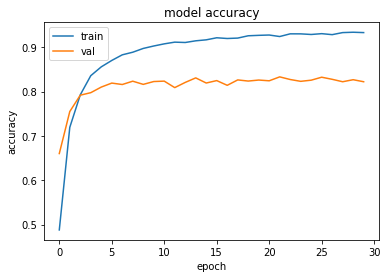

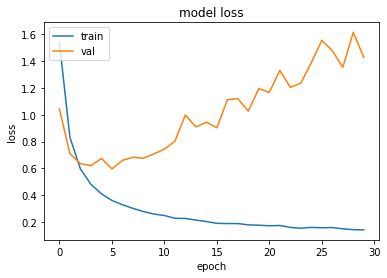

In [37]:
show_plot(train_history1)

In [38]:
model.save("/content/drive/MyDrive/XLNNTN/model.h5")

In [39]:
print('Đánh giá model 1:')
print('*************************************************************************')
danh_gia_model(model)

Đánh giá model 1:
*************************************************************************
Evaluate on test data
52/52 [==============================] - 5s 95ms/step - loss: 1.4279 - accuracy: 0.8223
test loss, test acc: [1.4278537034988403, 0.8223373293876648]


In [40]:
print('Tạo predict test trên 10 mẫu thử:')
print('*************************************************************************')
tao_pred_test(model, X_test)

Tạo predict test trên 10 mẫu thử:
*************************************************************************
Generate predictions for 10 samples
predictions shape: (10, 9)


array([8, 0, 0, 4, 7, 7, 7, 0, 8, 8])

**Model 2**

In [41]:
from keras.initializers import Constant

model2=keras.Sequential()
model2.add(keras.layers.Embedding(vocab_size,
                                 embedding_dim,
                                 embeddings_initializer=Constant(embedding_matrix),
                                 input_length=max_len))

model2.add(keras.layers.Bidirectional(keras.layers.LSTM(516, return_sequences=True)))
model2.add(keras.layers.Dropout(0.5))

model2.add(keras.layers.Conv1D(64,5,activation='relu'))
model2.add(keras.layers.Conv1D(64,5,activation='relu'))
model2.add(keras.layers.MaxPooling1D())

model2.add(keras.layers.Conv1D(128,5,activation='relu'))
model2.add(keras.layers.MaxPooling1D())

model2.add(keras.layers.Conv1D(128,5,activation='relu'))
model2.add(keras.layers.MaxPooling1D())

model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(1024,activation='relu'))
model2.add(keras.layers.Dense(9,activation='softmax'))

model2.summary()
model2.compile(loss='categorical_crossentropy', optimizer='adamax',  metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 300)          1664400   
                                                                 
 bidirectional_1 (Bidirectio  (None, 120, 1032)        3372576   
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 120, 1032)         0         
                                                                 
 conv1d_4 (Conv1D)           (None, 116, 64)           330304    
                                                                 
 conv1d_5 (Conv1D)           (None, 112, 64)           20544     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 56, 64)           0         
 1D)                                                  

In [42]:
train_history2 = model2.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
479/479 [==============================] - 86s 170ms/step - loss: 1.6806 - accuracy: 0.4357 - val_loss: 1.2954 - val_accuracy: 0.5653
Epoch 2/30
479/479 [==============================] - 80s 166ms/step - loss: 1.1450 - accuracy: 0.6117 - val_loss: 1.0377 - val_accuracy: 0.6329
Epoch 3/30
479/479 [==============================] - 79s 165ms/step - loss: 0.9121 - accuracy: 0.6880 - val_loss: 0.9589 - val_accuracy: 0.6755
Epoch 4/30
479/479 [==============================] - 79s 165ms/step - loss: 0.8199 - accuracy: 0.7215 - val_loss: 0.8126 - val_accuracy: 0.7248
Epoch 5/30
479/479 [==============================] - 80s 166ms/step - loss: 0.7357 - accuracy: 0.7516 - val_loss: 0.7508 - val_accuracy: 0.7512
Epoch 6/30
479/479 [==============================] - 78s 164ms/step - loss: 0.6615 - accuracy: 0.7781 - val_loss: 0.7394 - val_accuracy: 0.7641
Epoch 7/30
479/479 [==============================] - 78s 164ms/step - loss: 0.6149 - accuracy: 0.7934 - val_loss: 0.6792 - val_ac

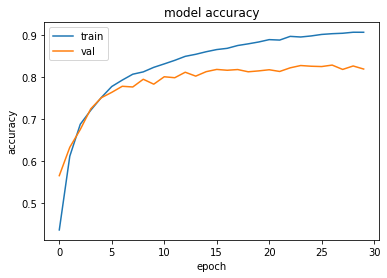

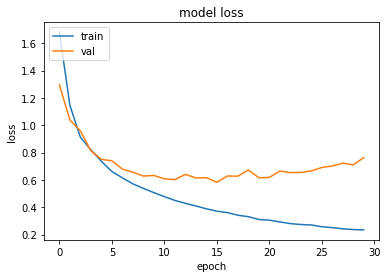

In [43]:
show_plot(train_history2)

In [44]:
model2.save("/content/drive/MyDrive/XLNNTN/model_2.h5")

In [45]:
print('Đánh giá model 2:')
print('*************************************************************************')
danh_gia_model(model2)

Đánh giá model 2:
*************************************************************************
Evaluate on test data
52/52 [==============================] - 5s 97ms/step - loss: 0.7633 - accuracy: 0.8197
test loss, test acc: [0.7632741332054138, 0.8197470903396606]


In [46]:
print('Tạo predict test trên 10 mẫu thử:')
print('*************************************************************************')
tao_pred_test(model2, X_test)

Tạo predict test trên 10 mẫu thử:
*************************************************************************
Generate predictions for 10 samples
predictions shape: (10, 9)


array([8, 0, 8, 4, 7, 7, 7, 0, 8, 8])

**Model 3**

## Training

In [47]:
from keras.initializers import Constant

model3=keras.Sequential()
model3.add(keras.layers.Embedding(vocab_size,
                                 embedding_dim,
                                 embeddings_initializer=Constant(embedding_matrix),
                                 input_length=max_len))

model3.add(keras.layers.Bidirectional(keras.layers.LSTM(100)))

model3.add(keras.layers.Dense(9,activation='softmax'))

model3.summary()
model3.compile(loss='categorical_crossentropy', optimizer='rmsprop',  metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 300)          1664400   
                                                                 
 bidirectional_2 (Bidirectio  (None, 200)              320800    
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 9)                 1809      
                                                                 
Total params: 1,987,009
Trainable params: 1,987,009
Non-trainable params: 0
_________________________________________________________________


In [48]:
train_history3 = model3.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
479/479 [==============================] - 37s 69ms/step - loss: 0.9621 - accuracy: 0.6760 - val_loss: 0.7312 - val_accuracy: 0.7576
Epoch 2/30
479/479 [==============================] - 30s 63ms/step - loss: 0.5626 - accuracy: 0.8060 - val_loss: 0.5911 - val_accuracy: 0.7935
Epoch 3/30
479/479 [==============================] - 29s 60ms/step - loss: 0.4752 - accuracy: 0.8341 - val_loss: 0.5435 - val_accuracy: 0.8108
Epoch 4/30
479/479 [==============================] - 27s 55ms/step - loss: 0.4258 - accuracy: 0.8499 - val_loss: 0.4967 - val_accuracy: 0.8344
Epoch 5/30
479/479 [==============================] - 25s 51ms/step - loss: 0.3865 - accuracy: 0.8639 - val_loss: 0.5107 - val_accuracy: 0.8301
Epoch 6/30
479/479 [==============================] - 24s 51ms/step - loss: 0.3571 - accuracy: 0.8745 - val_loss: 0.4931 - val_accuracy: 0.8335
Epoch 7/30
479/479 [==============================] - 24s 51ms/step - loss: 0.3305 - accuracy: 0.8822 - val_loss: 0.4918 - val_accuracy:

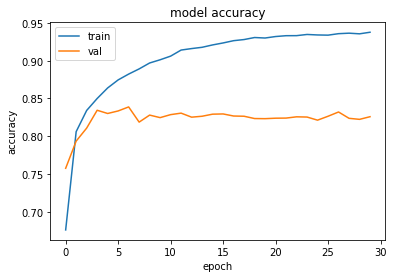

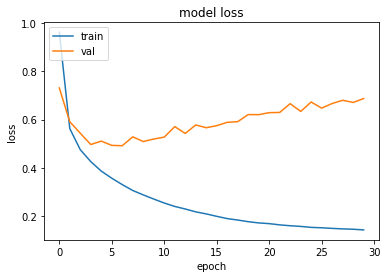

In [49]:
show_plot(train_history3)

In [50]:
model3.save("/content/drive/MyDrive/XLNNTN/model_3.h5")

In [51]:
print('Đánh giá model 3:')
print('*************************************************************************')
danh_gia_model(model3)

Đánh giá model 3:
*************************************************************************
Evaluate on test data
52/52 [==============================] - 1s 26ms/step - loss: 0.6873 - accuracy: 0.8258
test loss, test acc: [0.6872686743736267, 0.8258418440818787]


In [52]:
print('Tạo predict test trên 10 mẫu thử:')
print('*************************************************************************')
tao_pred_test(model3, X_test)

Tạo predict test trên 10 mẫu thử:
*************************************************************************
Generate predictions for 10 samples
predictions shape: (10, 9)


array([8, 0, 0, 4, 8, 7, 7, 0, 8, 8])

**Model 4 - Attention**

In [88]:
class Attention(tf.keras.Model):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)
 
    def call(self, features, hidden):
        # hidden shape == (batch_size, hidden size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden size)
        # we are doing this to perform addition to calculate the score
        hidden_with_time_axis = tf.expand_dims(hidden, 1)

        # score shape == (batch_size, max_length, 1)
        # we get 1 at the last axis because we are applying score to self.V
        # the shape of the tensor before applying self.V is (batch_size, max_length, units)
        score = tf.nn.tanh(
            self.W1(features) + self.W2(hidden_with_time_axis))
        
        # attention_weights shape == (batch_size, max_length, 1)
        attention_weights = tf.nn.softmax(self.V(score), axis=1)

        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
 
        return context_vector, attention_weights

In [89]:
from keras.layers import Concatenate, Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Flatten

model4 = keras.Sequential()

sequence_input = Input(shape=(max_len,), dtype="int32")
embedded_sequences = Embedding(vocab_size, embedding_dim)(sequence_input)

lstm = Bidirectional(LSTM(32, return_sequences = True), name="bi_lstm_0")(embedded_sequences)

# Getting our LSTM outputs
(lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(32, return_sequences=True, return_state=True), name="bi_lstm_1")(lstm)

state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])

context_vector, attention_weights = Attention(10)(lstm, state_h)

# Removal of the globalMaxPool1D could be trouble
#globmax = GlobalMaxPool1D()(context_vector)
dense1 = Dense(20, activation="relu")(context_vector)
dropout = Dropout(0.05)(dense1)
output = Dense(9, activation="softmax")(dropout)

model4 = model4.add(keras.Model(inputs=sequence_input, outputs=output))

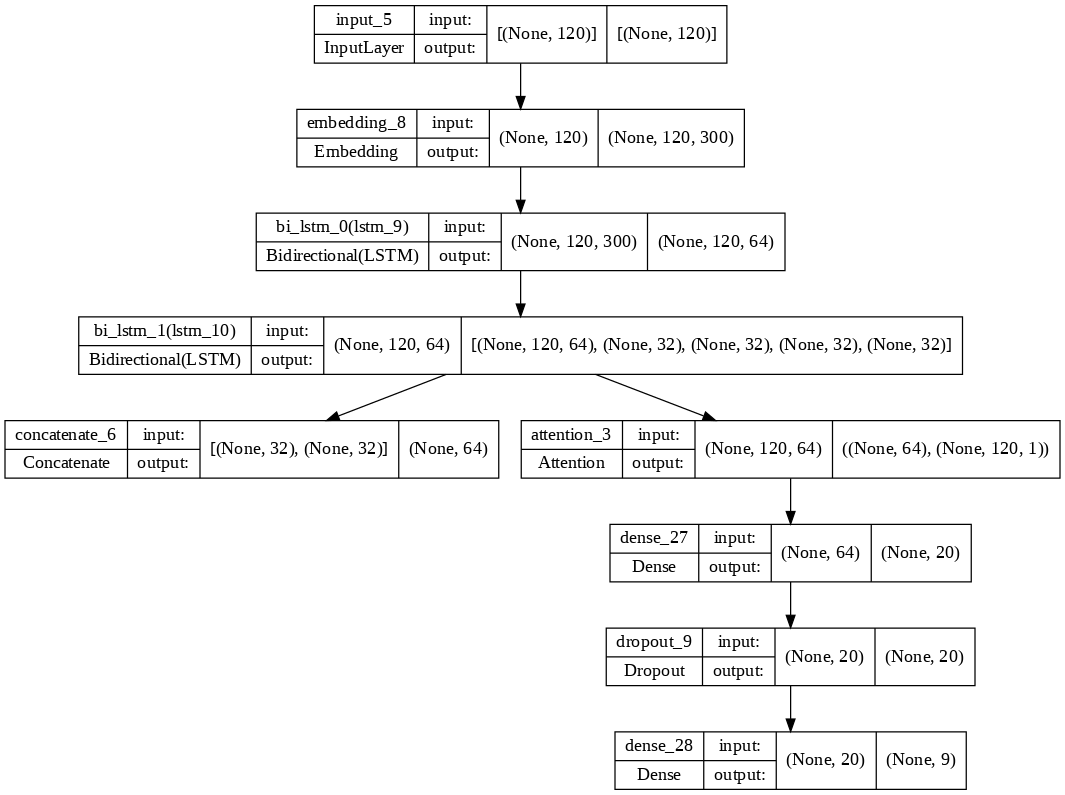

In [90]:
keras.utils.plot_model(model4, show_shapes=True, dpi=90)

In [91]:
model4.summary()
model4.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 120)]        0           []                               
                                                                                                  
 embedding_8 (Embedding)        (None, 120, 300)     1664400     ['input_5[0][0]']                
                                                                                                  
 bi_lstm_0 (Bidirectional)      (None, 120, 64)      85248       ['embedding_8[0][0]']            
                                                                                                  
 bi_lstm_1 (Bidirectional)      [(None, 120, 64),    24832       ['bi_lstm_0[0][0]']              
                                 (None, 32),                                                

In [92]:
train_history4 = model4.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
479/479 [==============================] - 77s 127ms/step - loss: 1.4061 - accuracy: 0.5067 - val_loss: 0.9311 - val_accuracy: 0.6628
Epoch 2/30
479/479 [==============================] - 59s 123ms/step - loss: 0.7519 - accuracy: 0.7541 - val_loss: 0.6623 - val_accuracy: 0.7882
Epoch 3/30
479/479 [==============================] - 59s 124ms/step - loss: 0.5749 - accuracy: 0.8132 - val_loss: 0.6283 - val_accuracy: 0.8042
Epoch 4/30
479/479 [==============================] - 59s 124ms/step - loss: 0.4819 - accuracy: 0.8438 - val_loss: 0.5854 - val_accuracy: 0.8175
Epoch 5/30
479/479 [==============================] - 59s 123ms/step - loss: 0.4272 - accuracy: 0.8601 - val_loss: 0.5807 - val_accuracy: 0.8184
Epoch 6/30
479/479 [==============================] - 59s 123ms/step - loss: 0.4242 - accuracy: 0.8555 - val_loss: 0.5961 - val_accuracy: 0.8130
Epoch 7/30
479/479 [==============================] - 59s 123ms/step - loss: 0.3601 - accuracy: 0.8819 - val_loss: 0.6003 - val_ac

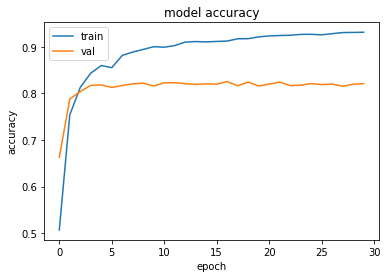

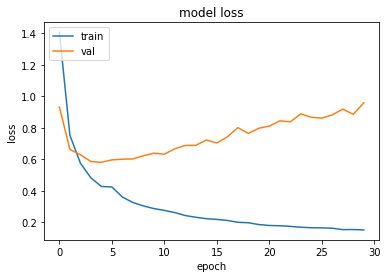

In [93]:
show_plot(train_history4)

In [94]:
model4.save("/content/drive/MyDrive/XLNNTN/model_4_Attention.h5")

NotImplementedError: ignored

In [ ]:
print('Đánh giá model Attention:')
print('*************************************************************************')
danh_gia_model(model4)

In [ ]:
print('Tạo predict test trên 10 mẫu thử:')
print('*************************************************************************')
tao_pred_test(model4, X_test)

**Model 5 - Transformer**

In [80]:
from keras.layers import MultiHeadAttention, LayerNormalization, Dropout, Layer

In [81]:
class TransformerBlock(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = Sequential(
            [Dense(ff_dim, activation="relu"), 
             Dense(embed_dim),]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [82]:
class TokenAndPositionEmbedding(Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [213]:
from keras.layers import GlobalAveragePooling1D
from keras.models import Sequential, Model

model5 = keras.Sequential()

embed_dim = 64  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 64  # Hidden layer size in feed forward network inside transformer

inputs = Input(shape=(max_len,))
embedding_layer = TokenAndPositionEmbedding(max_len, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = GlobalAveragePooling1D()(x)
x = Dropout(0.1)(x)
x = Dense(20, activation="relu")(x)
x = Dropout(0.1)(x)
outputs = Dense(9, activation="softmax")(x)

model5 = Model(inputs=inputs, outputs=outputs)

In [214]:
model5.summary()
model5.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 120)]             0         
                                                                 
 token_and_position_embeddin  (None, 120, 64)          362752    
 g_2 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 transformer_block_2 (Transf  (None, 120, 64)          41792     
 ormerBlock)                                                     
                                                                 
 global_average_pooling1d_2   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_16 (Dropout)        (None, 64)                0   

In [215]:
train_history5 = model5.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
479/479 [==============================] - 11s 19ms/step - loss: 1.3526 - accuracy: 0.5611 - val_loss: 0.7708 - val_accuracy: 0.7583
Epoch 2/30
479/479 [==============================] - 9s 18ms/step - loss: 0.6982 - accuracy: 0.7740 - val_loss: 0.6438 - val_accuracy: 0.8024
Epoch 3/30
479/479 [==============================] - 9s 18ms/step - loss: 0.5726 - accuracy: 0.8118 - val_loss: 0.6132 - val_accuracy: 0.7999
Epoch 4/30
479/479 [==============================] - 8s 18ms/step - loss: 0.4836 - accuracy: 0.8399 - val_loss: 0.5891 - val_accuracy: 0.8193
Epoch 5/30
479/479 [==============================] - 8s 18ms/step - loss: 0.4323 - accuracy: 0.8541 - val_loss: 0.6027 - val_accuracy: 0.8130
Epoch 6/30
479/479 [==============================] - 8s 17ms/step - loss: 0.3979 - accuracy: 0.8651 - val_loss: 0.6359 - val_accuracy: 0.8164
Epoch 7/30
479/479 [==============================] - 8s 18ms/step - loss: 0.3722 - accuracy: 0.8706 - val_loss: 0.6519 - val_accuracy: 0.822

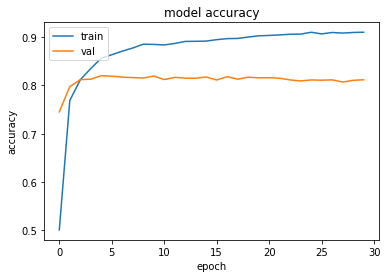

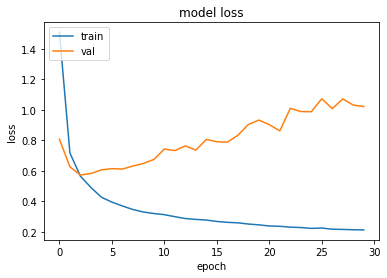

In [86]:
show_plot(train_history5)

In [87]:
model5.save("/content/drive/MyDrive/XLNNTN/model_5_Transformer.h5")

NotImplementedError: ignored

In [95]:
print('Đánh giá model Transformer:')
print('*************************************************************************')
danh_gia_model(model5)

Đánh giá model Transformer:
*************************************************************************
Evaluate on test data
52/52 [==============================] - 1s 11ms/step - loss: 1.0221 - accuracy: 0.8118
test loss, test acc: [1.0220506191253662, 0.811823844909668]


In [96]:
print('Tạo predict test trên 10 mẫu thử:')
print('*************************************************************************')
tao_pred_test(model5, X_test)

Tạo predict test trên 10 mẫu thử:
*************************************************************************
Generate predictions for 10 samples
predictions shape: (10, 9)


array([8, 0, 0, 4, 8, 7, 7, 0, 8, 8])

## Predict

In [97]:
label_names = ['tào lao', 'ngon - bình thường', 'dở', 'giá cao', 'giá hợp lý', 
               'vệ sinh sạch sẽ - thực phẩm an toàn', 'vệ sinh bẩn - thực phẩm không đảm bảo', 
               'thái độ phục vụ tốt', 'thái độ phục vụ tệ']

In [165]:
sent = 'ngon lắm luôn'
sent = tienxuly_Comment(sent)
sent = padding(sent)
sent = chuyenCauThanhSo(sent)
sent = np.array([sent])
sent = pad_sequences(sent, maxlen=max_len, padding='post')
index = np.argmax(model.predict(sent))
classes = label_names[index]
print(classes)

ngon lắm luôn
ngon lắm luôn Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad
[20, 47, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[20 47  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [192]:
def classify(text):
    text = tienxuly_Comment(text)
    text = padding(text)
    text = chuyenCauThanhSo(text)
    text = np.array([text])
    text = pad_sequences(text, max_len, padding='post')
    text = np.array(text).astype("float32")
    pred = model5.predict(text)
    classes = [label_names[i] for i in list(pred.argmax(axis=1))]
    return classes

In [193]:
import string
import re
text = "gián chạy lug tug trog quán"
pred = classify(text)
print(pred)

gián chạy lug tug trog quán Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad Pad
[145, 1712, 0, 0, 4545, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[ 145 1712    0    0 4545   10    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
  

In [ ]:
model.save("/content/drive/MyDrive/XLNNTN/model.h5")

1: Tào lao

2: Ngon, Tuyệt vời

3: Dở, tệ

4: Bán giá cao

5: Bán Giá rẻ

6: Vệ sinh sạch sẽ, thực phẩm an toàn

7: Vệ sinh bẩn, không an toàn thực phẩm

8: thái độ phục vụ tốt

9: thái độ phục vụ không tốt